In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [4]:
data = pd.read_csv('/content/sample_data/Apple.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-12,42.599998,42.980000,42.255001,42.275002,40.576008,142510800
1,2018-12-13,42.622501,43.142502,42.387501,42.737499,41.019917,127594400
2,2018-12-14,42.250000,42.270000,41.320000,41.369999,39.707371,162814800
3,2018-12-17,41.362499,42.087502,40.682499,40.985001,39.337845,177151600
4,2018-12-18,41.345001,41.882500,41.097500,41.517502,39.848946,135366000
...,...,...,...,...,...,...,...
1253,2023-12-05,190.210007,194.399994,190.179993,193.419998,193.419998,66628400
1254,2023-12-06,194.449997,194.759995,192.110001,192.320007,192.320007,41089700
1255,2023-12-07,193.630005,195.000000,193.589996,194.270004,194.270004,47477700
1256,2023-12-08,194.199997,195.990005,193.669998,195.710007,195.710007,53377300


In [5]:
# Xử lý dữ liệu
timestamps = pd.to_datetime(data['Date'])
prices = data['Close']

In [6]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [7]:
# Chia dữ liệu thành tập huấn luyện, tập kiểm tra và tập validation
train_size = int(len(scaled_prices) * 0.7)
test_size = len(scaled_prices) - train_size

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]


In [8]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 100  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [9]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [10]:
# Tạo mô hình DNN
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(time_steps,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [11]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 0.2033
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 13/100
13/13 [=================

In [12]:
# Dự đoán giá trong quá trình kiểm tra
y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)


# Tạo biến train, test, validate
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

# Tạo biến dự đoán 30 ngày tiếp theo
predicted_prices = prices[-30:]

9/9 [==============================] - 0s 3ms/step


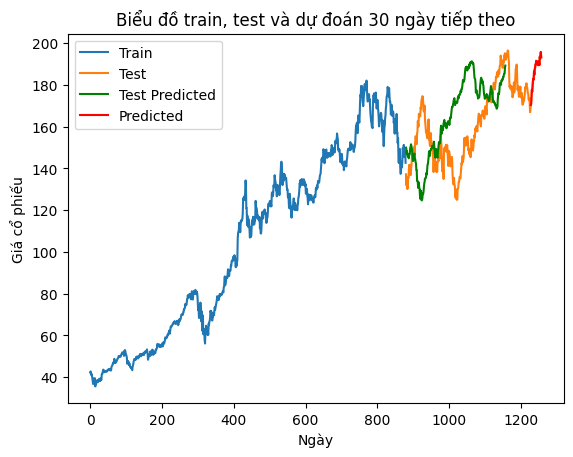

In [14]:
# Tạo biểu đồ train, test, validate và dự đoán 30 ngày tiếp theo
#plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size+len(test)), test, label='Test')
plt.plot(range(train_size, train_size+len(y_test_pred)), y_test_pred, 'g', label='Test Predicted')
plt.plot(range(len(prices)-30, len(prices)), predicted_prices, 'r', label='Predicted')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [15]:
print("Giá trị dự đoán 30 ngày tiếp theo:")
print(predicted_prices)

Giá trị dự đoán 30 ngày tiếp theo:
1228    170.289993
1229    170.770004
1230    173.970001
1231    177.570007
1232    176.649994
1233    179.229996
1234    181.820007
1235    182.889999
1236    182.410004
1237    186.399994
1238    184.800003
1239    187.440002
1240    188.009995
1241    189.710007
1242    189.690002
1243    191.449997
1244    190.639999
1245    191.309998
1246    189.970001
1247    189.789993
1248    190.399994
1249    189.369995
1250    189.949997
1251    191.240005
1252    189.429993
1253    193.419998
1254    192.320007
1255    194.270004
1256    195.710007
1257    193.179993
Name: Close, dtype: float64


In [16]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)


# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_test = scaler.inverse_transform(y_test)

# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)


9/9 [==============================] - 0s 2ms/step


In [17]:
mape_test *= 100
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print('-------------------')


MAPE: 2.647
MAE: 4.432
RMSE: 5.273
-------------------
